In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
    !nvidia-smi

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

##Start the Experment

Epoch 1/3
44/44 [==============================] - 15s 228ms/step - loss: 0.9992 - accuracy: 0.5094 - val_loss: 0.9450 - val_accuracy: 0.5793
Epoch 2/3
44/44 [==============================] - 9s 201ms/step - loss: 0.7216 - accuracy: 0.7621 - val_loss: 0.8292 - val_accuracy: 0.6282
Epoch 3/3
28/28 [==============================] - 0s 2ms/step
Epoch 1/3
44/44 [==============================] - 17s 243ms/step - loss: 1.0179 - accuracy: 0.4917 - val_loss: 0.9609 - val_accuracy: 0.5389
Epoch 2/3
44/44 [==============================] - 8s 191ms/step - loss: 0.7755 - accuracy: 0.6903 - val_loss: 0.7418 - val_accuracy: 0.6988
Epoch 3/3
28/28 [==============================] - 0s 3ms/step
Epoch 1/3
44/44 [==============================] - 14s 254ms/step - loss: 1.0026 - accuracy: 0.5043 - val_loss: 0.9323 - val_accuracy: 0.5951
Epoch 2/3
44/44 [==============================] - 8s 187ms/step - loss: 0.6761 - accuracy: 0.7318 - val_loss: 0.8067 - val_accuracy: 0.6801
Epoch 3/3
28/28 [========

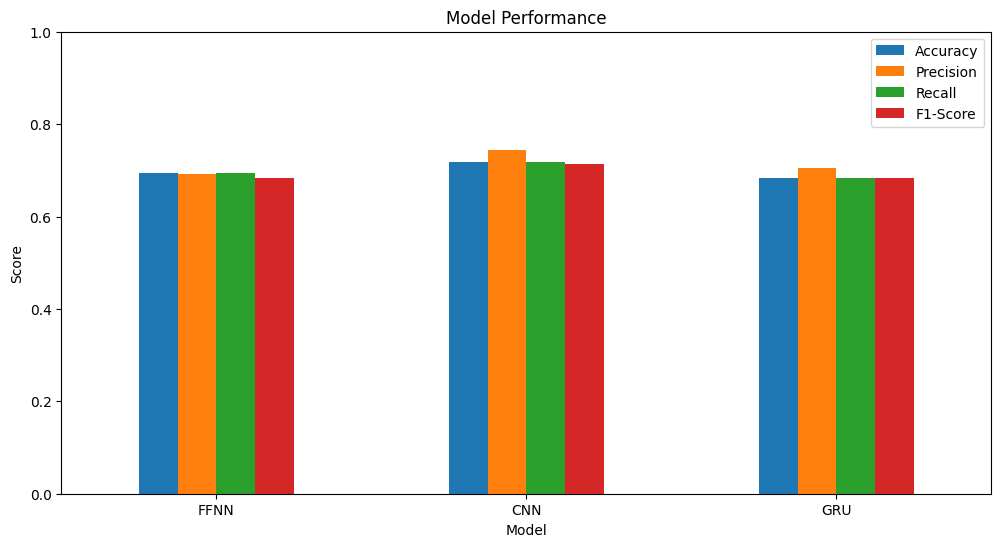

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/content/ReadyToUseSD_HSTypes_no_duplicates.csv')

# One-hot encoding
y = pd.get_dummies(data['HSTypes']).values

# Tokenization and padding
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(data['Tweet'])
sequences = tokenizer.texts_to_sequences(data['Tweet'])
X = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=128)

# Convert to float32
X = X.astype(np.float32)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# FFNN model
def create_ffnn():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(len(tokenizer.word_index) + 1, 100, input_length=128),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# CNN model
def create_cnn():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(len(tokenizer.word_index) + 1, 100, input_length=128),
        tf.keras.layers.Conv1D(128, 5, activation='relu'),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# GRU model
def create_gru():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(len(tokenizer.word_index) + 1, 100, input_length=128),
        tf.keras.layers.GRU(128),
        tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate each model
models = [('FFNN', create_ffnn), ('CNN', create_cnn), ('GRU', create_gru)]
results = []

for name, model_func in models:
    model = model_func()
    model.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.2)
    y_pred = model.predict(X_test).argmax(axis=1)
    y_true = y_test.argmax(axis=1)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_micro = f1_score(y_true, y_pred, average='micro')

    results.append((name, accuracy, precision, recall, f1, f1_macro, f1_micro))

# Create DataFrame to display results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'F1 Macro', 'F1 Micro'])
print(results_df)

# Plot results
results_df.set_index('Model').drop(columns=['F1 Macro', 'F1 Micro']).plot(kind='bar', figsize=(12, 6), ylim=(0,1), rot=0)
plt.ylabel('Score')
plt.title('Model Performance')
plt.show()
